# Petrol fiyatları analizi- Aylık, Haftalık ve Günlük değişimlerin analizi

### Baris Sanli barissanli2@gmail.com
www.barissanli.com/python

Petrol fiyatları genelde tahmin edilemez. Fakat petrol fiyat hareketlerinin tabii ki mevsimselliği var. Mesela Çin'in yeni yılı, Batı dünyasındaki resmi tatiller, ABD sürüş sezonu, rafinerilerin bakım sezonları... Veriye baktığımızda bunları görebilecek miyiz?

Bu yazıda Python'a yeni başlayanlar için ABD Enerji Bilgi Dairesi EIA'dan Brent petrol fiyatının günlük verisini indirerek üzerinde işlemleri göstermeye çalışıyorum. 

Python öğrenmek R'a göre biraz daha zor. Kütüphaneler, kurallar... Ama Python, son 5 yıldaki BASIC dili gibi oldu. Yani biraz öğrenince, internette arama ile her derde deva bir reçete bulunabiliyor. Öğrenmek ise zaman alıyor. Unutmayalım, öğrenmek eğlenceli olsa herkes ders çalışırdı.....

Bu yazıda:
* Petrol fiyatlarını internetten indirecek,
* Veri setindeki değişimlere bakacağız, biraz da filtrelemeye giriş
* Gruplama ve pivot tablo komutları
* Sonra da dönemsel verileri inceleyeceğiz

Ben Python ve R için Jupyter tavsiye ediyorum. Bu dosyada zaten Jupyter Notebook ile yazıldı. Bir defa kurunca kullanımı kolay rahat. Windows/linux/mac için Anaconda indirmeniz yeterli. Bir komuttan sonra kırmızı renkli uyarı mesajı gelir ise onu internette aratın. Kütüphaneyi bulamadıysa, yeni terminal açıp
**pip install kütüphane_ismi** yapmanız yeterli

Veriyi internetten indiriyoruz, ben bu dosyayı yazarken 8043 küsur nokta vardı. Veri dosyası güncellendikçe veri sayısı artar. 

EIA'in verileri webde Excel formatında buradan indirilebilir https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls . 1987'den beri her gün petrol kapanış fiyatlarını içeriyor

## Kütüphaneler

Başlamadan önce, ben Python'da her uyarının ekrana gelmesini sevmiyorum. O yüzden uyarıları aşağıdaki komutla bastırıyorum

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

Analiz için gerekli kütüphanelerden numpy(sayısal analiz) ve matplotlib(çizim) kütüphanelerini tek satır bir komutla **%pylab inline** ile dahil edebiliyoruz. 

In [2]:
# %pylab inline komutu ile numpy, matplotlib dahil edilir
%pylab inline

# veri düzenlemeleri için de Pandas'ı pd olarak alalım
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Veriye ilk bakış

Tüm örnek boyunca tek bir veri kullanacağımdan, ana veriyi indirerek **prices** adlı bir değişkene yükleyeceğim. Bunun üzerinde değişiklikleri yaparsam, değişen halini başka değişkenlere yükleyeceğim. Internet bağlantısı var ise, dosyayı **read_excel** komutu ile indirebiliriz. Eğer kütüphaneyi bulamazsa **Terminal** açarak **_xlrd_** yani Excel dosyası okuma kütüphanesini kurabilirsiniz. Bilgisayarınıza otomatik kurar. Bunun için
* Terminal/Konsol'a çıkıp xlrd kurmak için "**pip install xlrd**" yazıyoruz
* Veri kaynak noktamı da **Brent_data** olarak tanımlıyorum

In [3]:
Brent_data="https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls"

**read_excel** internetten dosyayı alarak Pandas'ın meşhur veri çerçevelerine çevirir. Fakat bir Excel dosyasının başında boş satırlar, sütünlar olabilir. Ayrıca veri birden çok alt sayfada da olabilir. Bu yüzden çalışma sayfası **"Data 1"**'de 2 satır atlayarak veri çekmeye başlıyoruz

In [4]:
prices=pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls",sheet_name="Data 1", skiprows=2)

Verimizin kaç satır/sütun olduğunu **.shape** alt özelliği görebiliriz.

In [5]:
prices.shape

(8048, 2)

Verimizin 8048 satır ve 2 sütunu var. Python da (satır,sütun) şeklinde veri tanımları vardır. Şimdi verimizin baş ve son tarafına bakalım
Sırasıyla **head** ve **tail** komutları ile verinin başını ve sonunu görebiliriz. İstersek baştaki ya da sondaki kaç satırı görmek istediğimizi de parantez içinde ekleyebiliriz.

In [6]:
#ilk 4 satır
prices.head(4)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60


In [7]:
# son 3 satır
prices.tail(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
8045,2019-01-31,62.46
8046,2019-02-01,61.86
8047,2019-02-04,62.26


And let's see the column titles with list command

In [8]:
list(prices)

['Date', 'Europe Brent Spot Price FOB (Dollars per Barrel)']

## Çizim

**%pylab inline** komutu kullandığımızdan **plot** yazarak doğrudan veriyi görebiliriz.

**_UYARI: %pylab inline komutunu baştaki gibi çalıştırmadıysanız, ne plot'u bulabilir ne de çizim yapar._**

Veri setimizdeki alt verileri görmek için **prices['** yazdıktan sonra TAB'a basmamız yeterli, Jupyter de otomatik tamamlama özelliği var . Ben mesela **Europe** yazıp TAB'a basınca alt veri geliyor

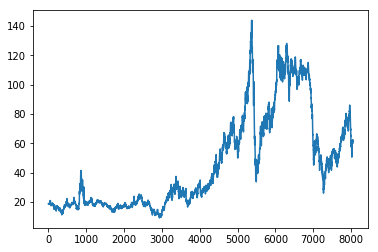

In [9]:
plot(prices['Europe Brent Spot Price FOB (Dollars per Barrel)'])

## Histogram

Histogram veri setimizin nasıl dağıldığını gösterir ve sadece **hist** komutu ile çağrılır. Verimizin normal mi dağıldığı, şişman kuyruklar (yani uç olaylar) histogram ile görülebilir.

Şimdi petrol fiyatlarının dağılımını görelim
 


(array([3052., 1314.,  644.,  818.,  696.,  353.,  268.,  726.,  149.,
          28.]),
 array([  9.1  ,  22.585,  36.07 ,  49.555,  63.04 ,  76.525,  90.01 ,
        103.495, 116.98 , 130.465, 143.95 ]),
 <a list of 10 Patch objects>)

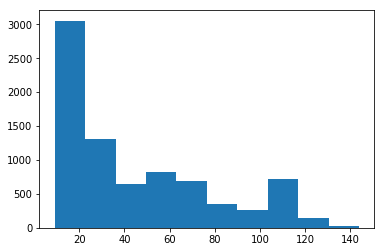

In [10]:
hist(prices['Europe Brent Spot Price FOB (Dollars per Barrel)'])

Grafikten sonra gelen yazılar can sıkıcı ise **.;** kullanarak bunları engelleyebilirsiniz. **hist** komutunda *_bins_* parametresi ile de çözünürlüğü arttırabilirsiniz. Yukarıda veri setini 10 kategori(bin) de değerlendirirken, şimdi 100 kategori de grafiği isteyelim

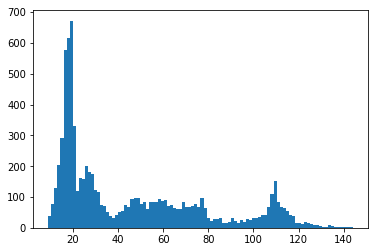

In [11]:
hist(prices['Europe Brent Spot Price FOB (Dollars per Barrel)'], bins=100);

Farkı gördünüz değil mi? **_bins=100_** ile çok daha yüksek çözünürlüklü bir veri dağılımı görüntüsüne sahip olduk.

Gerçekte petrol fiyatları hep 20\$ etrafındaymış gibi bir görüntü var. Tüm veri seti için bu doğru olabilir. Fakat petrol fiyatlarında önemli olan yüzde değişimlerdir.

Asıl bakmamız gereken % değişimlerin dağılımıdır. Bunun için python'da Pandas kütüphanesinde yüzde değişim komutu var. **_.pct\__change()_**. 

Veri setini seçip sonra **_.pct\__change()_** yazınca otomatik olarak % değişimleri hesaplıyor

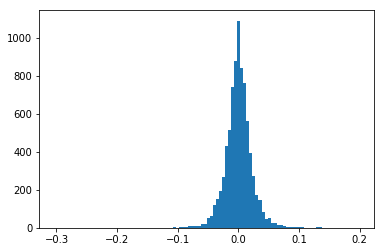

In [12]:
hist(prices['Europe Brent Spot Price FOB (Dollars per Barrel)'].pct_change(), bins=100 );

Petrol fiyatları görüldüğü gibi çok dağınık bir dağılım sergilemiyor. Hatta diyebiliriz ki hiç değişmemeye yakın. Fakat daha yakın bakmamız lazım.

Bir söz vardır, yarın için en iyi petrol fiyat tahmini bugün ki fiyatı söylemektir. Bakalım ne kadar doğru

## Yakın Plan

**hist** komutu otomatik olarak sınırları kendi belirliyor. Yukarıdaki grafiğe bakınca %30(-0.3)lere kadar negatif, %20 (0.2)lere kadar pozitif değişkenler görüldüğü söylenebilir. Göz ucuyla bakınca, veri setinin önemli kısmı %5 ile %-5 arasında dağılıyor gibi gözükmektedir.

% değişimleri **pct_change()** ile hesaplattıktan sonra, bu hesaplanan verileri **pc** değişkenine atayalım, sonra geri kalan işlemleri **pc** ile yaparız.

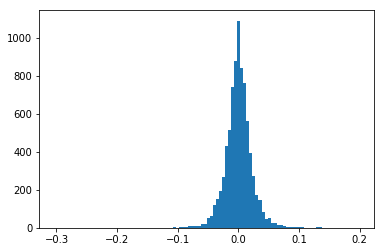

In [13]:
pc=prices['Europe Brent Spot Price FOB (Dollars per Barrel)'].pct_change()
hist(pc, bins=100);

## Veriyi filtrelemek

Yukarıdaki grafik daha detay bakış için kaba. Özellikle %1 ve %-1 arasındaki veriyi görmek isteyebilirim.
Bu iki şekilde olur.  
* Veriyi filtreler, hist ile çizdiririm
* Ya da hist komutuna bir **range=** parametresi verebilirim

Önce filtreleme ile başlayalım.

Normalde tüm verilerimiz **pc**'de. Yani yüzde değişim. Eğer
* pc>0.01
yazarsam, **pc** verisetinde hücre değerlerinin 0.01'in üzerinde olduğu tüm hücreleri doğru/yanlış yani **True** ve **False** olarak verir. Bu değerleri tekrar **pc** veri setine girersek de, doğru yani **True** olan hücre değerlerini alırız

Şimdi ilk adımla başlayalım... Yer kazanmak adına daima  **head(5)** komutu ile verisetinin sadece başına bakıyorum.
Adım 1. %1 yani 0.01'den yüksek değerleri hücrelerin yerini saptayalım


In [14]:
(pc>0.01 ).head(5)

0    False
1    False
2    False
3    False
4    False
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: bool

Şimdi bu doğru/yanlış verilerini veri setine girerek 0.01 den büyük hücre değerlerini ve en başta satır değerlerini elde edelim.

In [15]:
pc[pc>0.01].head(5)

26    0.020321
30    0.014226
35    0.010267
39    0.020121
41    0.011275
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: float64

Aynı zamanda birden çok koşulu mantıksal operatörler (& ve diğerleri ile) birleştirebiliriz. 

Mesela %1'den düşük ve %-1'den küçük değerlere(negatif değerlerde büyüklük-küçüklük ters) sahip hücreleri belirlemek için:

**_(pc<0.01) & (pc>-0.01)_**


In [16]:
pc[(pc<0.01) & (pc>-0.01)].head(3)

1   -0.009662
2    0.005420
3    0.002695
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: float64

Şimdi %1 ve %-1 arasındaki hücrelerin dağılımını çizdirelim

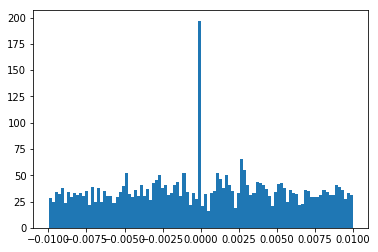

In [17]:
hist(pc[(pc<0.01) & (pc>-0.01)], bins=100);

Çok garip görünüyor, bir de %5 ve %-5 arasındaki verilere bakalım

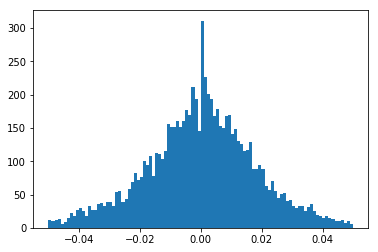

In [18]:
hist(pc[(pc<0.05) & (pc>-0.05)], bins=100);

Tüm bunun daha kolay bir yöntemi var, tüm veri setini alıp, **hist** komutuna 
**range= (-0.05, 0.05)** parametresi girerek histogramın %5 ve %-5 arasındaki grafiğini görebiliriz

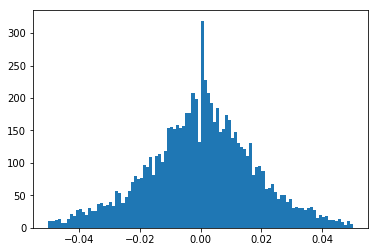

In [19]:
hist(pc, bins=100, range=(-0.05,0.05));

## Dağılımın uç değerlerini görmek

Şimdi de, tüm seride, %1 ve %-1 arasındaki verilerin miktarını görmek isteyebiliriz. Bunun için ise **.count** komutunu kullanabiliriz. 


In [20]:
# Orjinal verinin yapısı
pc.shape

(8048,)

**shape** genelde 2li bir veri döndürür. İçindeki veriyi almak için [0] veya [1] ile satır-sütun verisini çekebiliriz. Unutmayın Python'da (satır, sütun)

In [21]:
pc.shape[0]

8048

Verimizde bu yazının yazıldığı tarihte 8048 satır vardı. Daha sonra çalıştırıldığında bu satır sayısı artacaktır. Çünkü yeni petrol kapanış fiyatları eklenmeye devam ediyor, Excel dosyası EIA tarafından güncelleniyor.

In [22]:
pc.count()

8047

***Uyarı***
shape ile sorduğumuzda 8048 satır vardı, count ile sorduğumuzda 8047 satır olduğu söylendi. Sorun şu, count() NA veri noktalarını yani olmayan verileri saymaz. 

Olasılıkları hesaplarken iki yöntemi de göstermeye çalışacağım


%1 ile %-1 arasındaki verilerin oranı = (%1 ve %-1 arasındaki veri sayısı) / (toplam veri sayısı)

Başlayalım

In [23]:
# For 1% 
pc[(0.01>pc) & (-0.01<pc)].shape[0]/pc.shape[0]

0.44719184890656066

Peki %5 ile %-5 arasındaki veri sayısı

In [24]:
pc[(0.05>pc) & (-0.05<pc)].shape[0]

7770

Eğer %5 ila %-5 arasında değişimlerin sayısı 7770 ise, %5 ila %-5 arasındaki değişimlerin tüm değişimlere oranı 7770/8048 olacaktır

In [25]:
7770/8048

0.9654572564612326

Şimdi bunları sıra ile hesaplayarak notlara yazdırabiliriz

In [26]:
print("1% ile -1% arasındaki günlük petrol fiyat değişimlerinin oranı  ", (100*pc[(0.01>pc) & (-0.01<pc)].shape[0]/pc.shape[0]))
print("5% ile -5%  arasındaki günlük petrol fiyat değişimlerinin oranı " ,(100*pc[(0.05>pc) & (-0.05<pc)].shape[0]/pc.shape[0]))
print("5%'ün üzerindeki günlük petrol fiyat değişimlerinin oranı " , (100*(pc[(0.05<pc)].shape[0])/pc.shape[0]))
print("-5%ten daha küçük günlük petrol fiyat değişimlerinin oranı" ,  (100*pc[(-0.05>pc)].shape[0]/pc.shape[0]))

1% ile -1% arasındaki günlük petrol fiyat değişimlerinin oranı   44.71918489065607
5% ile -5%  arasındaki günlük petrol fiyat değişimlerinin oranı  96.54572564612326
5%'ün üzerindeki günlük petrol fiyat değişimlerinin oranı  1.9880715705765408
-5%ten daha küçük günlük petrol fiyat değişimlerinin oranı 1.4537773359840955


Gördüğünüz gibi bir sürü sayılar sayılar. Print komutu ile formatlama da yaparak daha güzel sayı dizilimleri elde edebiliriz.

Fakat bazı dikkat edilmesi gereken noktalar var. Eğer formatlama sistemi kullanıyorsanız, tırnak içindeki gerçek % işaretleri %% (iki) şeklinde yazılmalı, aksi halde hata verir. Buraları da formatlayacağını zanneder.

Sırayla yapılacaklar:

1. **Tüm '%'(cümle içinde yüzde için kullanılan) işaretlerini '%%'** çevirin ki Python bunları da formatlamaya kalkmasın
2. Tırnak bittikten sonra sayı vs eklemek için virgül (,) yerine *%* kullanın
3. Sayıların cümle içinde geleceği yere **'%.2f'** (yani noktadan sonra 2 ondalık ) kullanın

In [27]:
print("1%% ile -1%% arasındaki günlük petrol fiyat değişimlerinin oranı %.2f%%" % (100*pc[(0.01>pc) & (-0.01<pc)].shape[0]/pc.shape[0]))
print("5%% ile -5%%  arasındaki günlük petrol fiyat değişimlerinin oranı %.2f%%" % (100*pc[(0.05>pc) & (-0.05<pc)].shape[0]/pc.shape[0]))
print("5%%'ün üzerindeki günlük petrol fiyat değişimlerinin oranı %.2f%%" % (100*(pc[(0.05<pc)].shape[0])/pc.shape[0]))
print("-5%%ten daha küçük günlük petrol fiyat değişimlerinin oranı %.2f%%" % (100*pc[(-0.05>pc)].shape[0]/pc.shape[0]))

1% ile -1% arasındaki günlük petrol fiyat değişimlerinin oranı 44.72%
5% ile -5%  arasındaki günlük petrol fiyat değişimlerinin oranı 96.55%
5%'ün üzerindeki günlük petrol fiyat değişimlerinin oranı 1.99%
-5%ten daha küçük günlük petrol fiyat değişimlerinin oranı 1.45%


## Uç değerler - Minimum, Maksimum değerler ve yerleri

Şimdi uç değerleri inceleyelim. Öncelikle en uç değerlerin olduğu, dağılım eğrisinin şişman uçlarını görmeye çalışalım.

Öncelikle en büyük fiyat düşüşlerine bakalım. Yani %-5 ile %-31 arasındaki değerleri görelim. Bunun için **hist** komutuna **range=** parametresi girmek yeterli

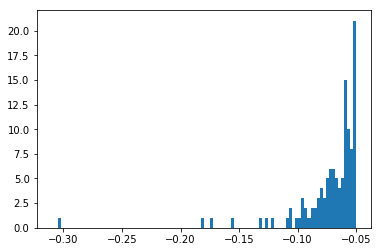

In [28]:
hist(pc, bins=100, range=(-0.31,-0.05));

Ama en düşük değer tam olarak kaç? Bunun için **min** komutunu kullanıyoruz

In [29]:
pc.min()

-0.30317040951122853

Bir gündeki en büyük fiyat düşüşü **-30%**. Peki bu hangi gün oldu? Önce kaçıncı satırda minimum değerin gerçekleştiğini görelim, komutumuz **idxmax()**

In [30]:
pc.idxmin()

936

936. satırda en küçük değer oluşmuş. Fakat gerçek fiyat değişkenleri değil değişimleri üzerinde çalıştığımızdan 936.satır için orjinal verideki satırları sorgulayacağız.

Orjinal verimiz **prices** dı, yüzde değişimler **pc** 

Belirli bir satırdaki değere ulaşmak için kullanacağımız komut **iloc** . Örneğin **veri.iloc[satır, sütun]** gibi.Ben aslında tam 936'yı değil etrafındaki satırları da görmek isterim. 

Bunun için iki yolumuz var:
1. Veri lokasyonunu bir dizi şeklinde istemek **[935,936,937]**
2. Yada **range** komutu ile o satırları isteyebiliriz. **range(935,938)**

In [31]:
prices.iloc[[935,936,937]]

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
935,1991-01-16,30.28
936,1991-01-17,21.10
937,1991-01-18,19.10


In [32]:
prices.iloc[range(935,938)]

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
935,1991-01-16,30.28
936,1991-01-17,21.10
937,1991-01-18,19.10


Peki neden **pc** den istemedik? Görelim, şimdi pc ile o satırlara bakalım. 

In [33]:
pc.iloc[[935,936,937]]

935    0.035214
936   -0.303170
937   -0.094787
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: float64

Gördüğünüz gibi hiç tarih verisi yok. Çünkü orjinal veriden bir değişim hesaplayıp başka bir değişkene aktık, bu sebeple orjinal verinin endeksi (tarihler) yeni değişkene gelmedi

Şimdi de maksimum değerin yerini bulalım. **.idxmax()** komutu ile maksimum değerin satırını bulabiliriz.

In [34]:
# maksimum değer
pc.idxmax()

5499

In [35]:
prices.iloc[range(5498,5501)]

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
5498,2008-12-31,35.82
5499,2009-01-02,42.94
5500,2009-01-05,45.84


Sonuç olarak. 
1. Petrol fiyatlarındaki en büyük düşüş 17 Ocak 1991'de oldu. Petrol fiyatları 30'dan 21\$ a düştü
2. Petrol fiyatlarındaki en büyük artış ise 2 Ocak 2009'da oldu. Fiyatlar 35'den to 42\$'a çıktı

## Verisetini geliştirmek : Hafta, Ay, %değişim ile daha büyük bir veri seti

Internetten indirdiğimi veri setinde sadece Brent fiyatları var. **prices** veri setimize aşağıdaki başlıkları da eklemek isteyebilirz
* Gun
* Hafta
* Ay 
* Yil 
* Yuzde_Degisim

İlk adım olarak Hafta verisini ekleyelim. Bu o tarihin yılın hangi haftasına denk geldiğini verecek.

Yeni bir sütun oluşturmak çok kolay. Sadece yeni sütun ismi ile yeni bir değişken tanımlayıp, hesapladığımız değerleri oraya atıyoruz. Bu durumda "Hafta" başlığı ile yeni sütun açmak yeterli olacaktır.

İndirdiğimiz veri setinin indeksi - yani ana göstergesi **Date** olduğundan doğrudan bu tarihten datetime kütüphanesi dt ile dönüşüm yapacağız.

In [36]:
# Hafta isimli yeni bir sütun oluştur ve veriseti endeksinde tarihin hafta değerini al
prices["Hafta"]=prices["Date"].dt.week

Veri setimizin son 3 satırını görelim

In [37]:
prices.tail(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Hafta
8045,2019-01-31,62.46,5
8046,2019-02-01,61.86,5
8047,2019-02-04,62.26,6


Eğer problem yaşamadıysak ay, yıl ve haftanın günü(HG) değişkenlerini de ekleyebilir. Değişken isimlerinde Türkçe karakterler sorun olduğundan ben ingilizce alfabe ile değişkenleri tanımlamayı tercih ettim.

In [38]:
prices["Ay"]=prices["Date"].dt.month
prices["Yil"]=prices["Date"].dt.year
prices["HG"]=prices["Date"].dt.dayofweek

Veri setimizi genişlettik. Haftanın günü (HG) verisi Pazartesi için 0, Cuma için 4 değerini verir. Petrol piyasaları haftasonu açık olmadığından sadece haftaiçi değişkenleri var.

In [39]:
#let's see last 4 lines
prices.tail(4)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Hafta,Ay,Yil,HG
8044,2019-01-30,61.89,5,1,2019,2
8045,2019-01-31,62.46,5,1,2019,3
8046,2019-02-01,61.86,5,2,2019,4
8047,2019-02-04,62.26,6,2,2019,0


Şimdi analizimize devam edebiliriz

## Python Pandas ile pivot tablolama

### Gruplama

Toplulaştırılmış veri oluşturmak için en kolay yol gruplandırmadır. Mesela veriyi haftalara göre gruplandırabilirz. **pandas** kütüphanesinde, doğrudan veri setinden çağırabileceğimiz **groupby** komutu ile gruplama yapabiliriz. Daha sonra gruplanan verinin ortalamasını **.mean()** ile veya sayısını **.count()** ile alabiliriz. **prices** yazıp **.** koyup **TAB** a basmanız yeterli, alt komutlar çıkacaktır.

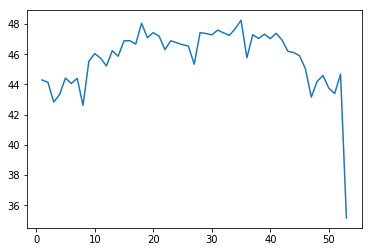

In [40]:
plot(prices.groupby("Hafta")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean())


Maalesef bazı yıllarda 53 hafta olabiliyor, bu yüzden ilk 52 haftayı almak için **head(52)** komutunu kullanabiliriz.

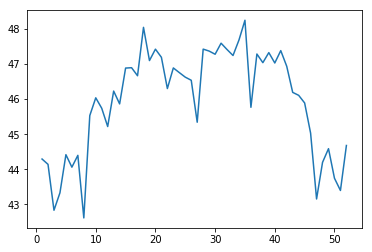

In [41]:
plot(prices.groupby("Hafta")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(52))


Grafiğe bir başlık ve eksen isimleri gerekiyor. **%pylab inline** 'ı en başta yazdığımız ve çalıştırdığımız için şimdi çizim alt komutlarını doğrudan **title**, **xlabel** veya **ylabel** olarak çağırabiliriz.

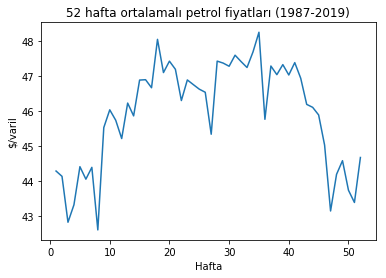

In [42]:
plot(prices.groupby("Hafta")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(52))
title("52 hafta ortalamalı petrol fiyatları (1987-2019)")
xlabel("Hafta")
ylabel("$/varil");

Şimdi bir sonraki aşamayı deneyelim. Sadece tek 1 yıl verisini çekmeye çalışalım. Mesela 2018

İki adımlı bir yolumuz olacak.

1) pc'de yaptığımız gibi önce yil verisinin 2018'e ait olduğu satırları alalım.  **prices[prices.Yil==2018]**

2) ilk 4 satırına bakalım **.head(4)**


In [43]:
pf=prices[prices.Yil==2018]
pf.head(4)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Hafta,Ay,Yil,HG
7772,2018-01-02,66.65,1,1,2018,1
7773,2018-01-03,67.85,1,1,2018,2
7774,2018-01-04,68.73,1,1,2018,3
7775,2018-01-05,68.01,1,1,2018,4


Şimdi de filtrelediğimiz sonuçları gruplayarak, sonra da ortalamalarını alacağız.

In [44]:
pf.head(4)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Hafta,Ay,Yil,HG
7772,2018-01-02,66.65,1,1,2018,1
7773,2018-01-03,67.85,1,1,2018,2
7774,2018-01-04,68.73,1,1,2018,3
7775,2018-01-05,68.01,1,1,2018,4


In [45]:
# Just look at the averages for the first 4 week
pf.groupby("Hafta")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(4)

Hafta
1    67.810
2    69.470
3    69.388
4    70.040
Name: Europe Brent Spot Price FOB (Dollars per Barrel), dtype: float64

Şimdi herşeyi birleştirelim ve grafiğini çıkaralım

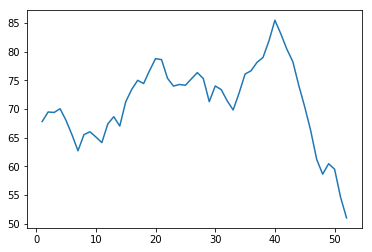

In [46]:
plot(pf.groupby("Hafta")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean())


Veya herşeyi tek satırda da yazabiliriz. Yani 2018'deki haftaların ortalama fiyatı... 

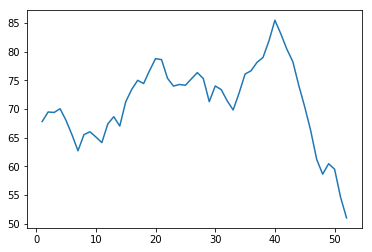

In [47]:
plot(prices[prices.Yil==2018].groupby("Hafta")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean())

Şimdi son 5 yıl ve 10 yılın grafiklerini de görebiliriz

* 5 yıl için *range(2014,2019)* veya *prices.Yil>=2014*
* 10 yıl için *range(2009,2019)* veya *prices.Yil>=2004*

komutlarını kullanabiliriz.

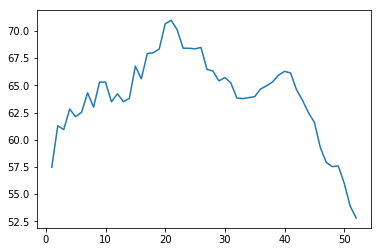

In [48]:
plot(prices[prices.Yil>=2014].groupby("Hafta")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(52))

Bunu daha okunabilir şekilde de yapabiliriz. Örneğin

1) 2014'ten büyük yılları ayrı bir değişkene atarız mesela **p2014_2019** 

2) Ardından tüm işlemleri **p2014_2019** için yaparız.


In [49]:
p2014_2019=prices[prices.Yil>=2014]

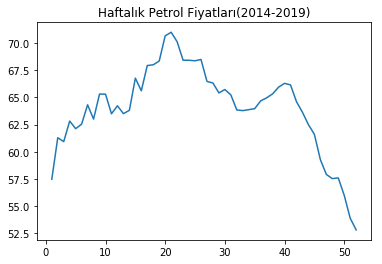

In [50]:
plot(p2014_2019.groupby("Hafta")['Europe Brent Spot Price FOB (Dollars per Barrel)'].mean().head(52))
# title for the plot and ";" for supressing text output
title("Haftalık Petrol Fiyatları(2014-2019)");

### Pivot Tablolar

**Uyarı** _Ben aynı işlemleri hem groupby hem de pivot_table ile yaptım. Ama sonuçlar küçük de olsa ayrışıyordu. NA(olmayan veri) işlevinden olabilir diye fonksiyon opsiyonlarını denedim, ama sonuç elde edemedim_


Pivot tablolara veri analizinde önemli araçlardandır. Bilmeyenler için elimizdeki günlük veriden, haftaları satıra, yılları sütuna al, Brent rakamlarını da ortalamalardan oluştur diye tek satır ile dönüşüm yapabileceğiz. 

Orjinal veri setinden verileri aşağıdaki adımlar ile şekillendireceğiz
* Yeni veri setinin endeksini(ana kolon, satır verilerinin neye karşılık geldiğini) berlirliyoruz           ---->    **index=['Hafta']**
* Ardından veri setimizin sütunları yıllar olacak          ---->    **columns=['Yil']**
* numpy kütüphanesinden günlük Brent fiyatlarının ortalamasını işleyeceğiz        ---->    **aggfunc=np.mean**
* Hafta ve yıllara göre ortalaması alınan değerler Brent fiyatlar olacak       ---->    **values='Europe Brent Spot Price FOB (Dollars per Barrel)'**

Petrol fiyatını uzun uzun _"Europe Brent Spot Price FOB (Dollars per Barrel)"_ yazmıyorum, Jupyter de Euro yazıp **tab** a basınca kendinden geliyor



In [51]:
pt=prices.pivot_table( values='Europe Brent Spot Price FOB (Dollars per Barrel)', index=['Hafta'],
                     columns=['Yil'], aggfunc=np.mean)

Pivot tablomuzu oluşturarak yüklediğimi pt değişkenine bakalım(pt pivot tablo kısaltması)

In [52]:
pt.head(4)

Yil,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Hafta,,,,,,,,,,,,,,,,,,,,,
1,NaN,17.4525,16.590,23.566,22.332,18.475,17.510,14.1775,16.0725,20.763333,...,79.8180,94.722,112.168,111.8020,76.648,55.3800,34.194,55.1275,67.810,54.310
2,NaN,16.4360,16.980,21.674,25.328,17.772,17.052,14.0000,16.2320,18.528000,...,78.3100,97.086,111.776,112.3720,107.014,49.4660,29.100,54.0160,69.470,58.636
3,NaN,16.9080,17.896,21.052,25.856,18.370,16.978,14.2160,16.8840,17.614000,...,74.2825,97.340,109.600,111.3460,107.828,46.5780,27.756,54.1940,69.388,59.830
4,NaN,16.2400,17.328,20.494,20.766,18.112,18.004,14.6420,16.8480,17.188000,...,71.8820,96.620,109.180,113.7175,109.140,46.4425,31.748,54.9060,70.040,61.342


## Şimdi Filtreleme Yapalım

Bakınca 1987'de amma çok NaN -olmayan veri- var gözüküyor. Çünkü veri seti 1987 Mayıs'tan başlıyor. Diğerlerinde sorun gözükmüyor.

Şimdi 2014 ile 2019 arasındaki yılları seçerek ilk 52 haftalarını çizebiliriz
* range(2014, 2020) komutu 2014,2015,2016,2017,2018,2019.... dizisini oluşturur. range'de bitiş noktası dahil değildir
* Her yıldaki haftaların ortalamasını **mean** komutunu **(axis=1)** ile alıyoruz. axis=1 ile satırların ( yani aynı haftaların) ortalamasını al diyoruz.
* 53ncü hafta ender görülen bir şey, o yüzden sadece ilk 52 haftayı alıyoruz **head(52)**

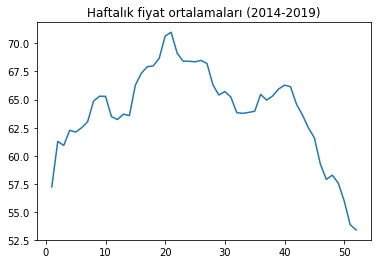

In [53]:
plot(pt.loc[:,range(2014,2020)].mean(axis=1).head(52))
title ("Haftalık fiyat ortalamaları (2014-2019)");

İnanmazsanız range komutunun neleri içerdiğine bakabilirsiniz

In [54]:
# range command does not include the last element 
print(*range(2014,2020))

2014 2015 2016 2017 2018 2019


Eğer sorun yoksa **pct_change()** ile haftadan haftaya %değişimleri de hesaplayalım

In [55]:
ptpc=pt.pct_change()

Daima verisetini yada bir kısmını kontrol edin (mesela ilk 4 satırı **head(4)** ile görelim)

In [56]:
ptpc.head(4)

Yil,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Hafta,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-0.058244,0.023508,-0.080285,0.134157,-0.038051,-0.026156,-0.012520,0.009924,-0.107658,...,-0.018893,0.024957,-0.003495,0.005098,0.396175,-0.106789,-0.148974,-0.020162,0.024480,0.079654
3,NaN,0.028717,0.053946,-0.028698,0.020846,0.033648,-0.004340,0.015429,0.040168,-0.049331,...,-0.051430,0.002616,-0.019468,-0.009130,0.007606,-0.058384,-0.046186,0.003295,-0.001180,0.020363
4,NaN,-0.039508,-0.031739,-0.026506,-0.196860,-0.014045,0.060431,0.029966,-0.002132,-0.024185,...,-0.032316,-0.007397,-0.003832,0.021298,0.012168,-0.002909,0.143825,0.013138,0.009396,0.025272


İlk satır hep NaN, yani hesaplanamadı, Çünkü ilk satır yani hafta 1'in üstünde bir değer yok. 

Şimdi bir de grafikleyelim, haftalık ortalama % değişimleri.

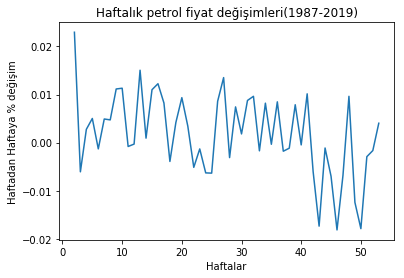

In [57]:
plot(ptpc.mean(axis=1))
title("Haftalık petrol fiyat değişimleri(1987-2019)")
xlabel("Haftalar")
ylabel("Haftadan Haftaya % değişim");

#### 5 ve 10 yıllık ortalama haftalık fiyatlar

% değişimler yerine, dikkatimizi tekrar orjinal veriler **pt** 'ye çevirelim. Son 5 ve 10 yıldaki fiyat ortalamalarını çıkarmaya çalışalım
 
* Yıl verilerini oluştur range(2014, 2019)   ---> 2014,2015,2016,2017,2018
* **pt** verisetinde bu yılları seç          ---> pt.loc[:range(2014,2019)]
* Seçtiğimiz yıllardaki hafta ortalamaları al ---> mean(axis=1)
* 53ncü haftayı atla                         ---> head(52)

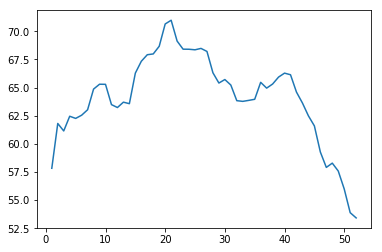

In [58]:
# First 5 years 2014,2015,2016,2017,2018
plot(pt.loc[:,range(2014,2019)].mean(axis=1).head(52))

Şimdi 10 yılı görelim

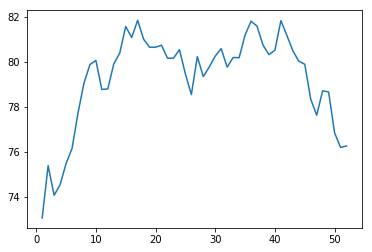

In [59]:
# 10 years of average weekly prices
plot(pt.loc[:,range(2009,2019)].mean(axis=1).head(52));

10 yıllık ortalamada, 10ncu hafta civarı büyük bir artış gördük. Fakat benim tavsiyem son 5 yıla bakmak çünkü ABD şeyl üretimi son 5 yılda ana etkisini oluşturdu. Ben 5 yılı yapayım, siz 10 yılı deneyebilirsiniz. 

Bu sefer veriyi alıp, yüzde değişimlere bakalım **pct_change** ile

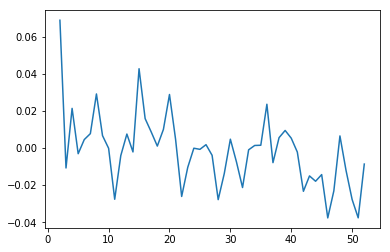

In [60]:
pt_haftalik=pt.loc[:,range(2014,2019)].mean(axis=1).head(52)
plot(pt_haftalik.pct_change());

5 yılda bir şeye dikkat ettiniz mi? Yılın başında bir sürü artış, son çeyrekte ise bir sürü düşüş (0'ın altında değişim var)

Şimdi bu değişimlere de yakından bakalım. Kodumuz güzel gözüksün diye yüzde değişimleri ayrı bir değişkene atalım

In [61]:
pt_haftalik_pc=pt_haftalik.pct_change()

Bu sefer mutlak değer 2%'nin üzerindeki değişimleri görmeye çalışalım.
* Yüzde değişimin abs ile mutlak değerini alalım---->   abs(pt_weekly_pc)>0.02
* Şimdi de bu değerleri görelim                 ---->   pt_weekly_pc[abs(pt_weekly_pc)>0.02]

In [62]:
pt_haftalik_pc[abs(pt_haftalik_pc)>0.029]

Hafta
2     0.068843
8     0.029134
15    0.042727
46   -0.037651
51   -0.037612
dtype: float64

## Haftaları Tarihlere Çevirme

%2'nin(+-%2) üzerinde değişimlerin olduğu hafta rakamlarını biliyoruz, fakat bunlar bu sene(2019)'da hangi tarihlere denk geliyor. 

Beni işi birazda daraltmak adına 2.9% (tamamen rastsal), değişimlerin üzerindeki değişim haftalarını alıyorum. Önce bu verilerin olduğu hafta rakamlarını (.index.values) ile alıyor **strptime** komutu ile de tarihe çeviriyorum. Tarih çevrimlerinden nefret ediyorum....


In [63]:
for hafta in pt_haftalik_pc[abs(pt_haftalik_pc)>0.029].index.values:
    print(time.asctime(time.strptime('{} {} 1'.format(2019, hafta), '%Y %W %w')))

Mon Jan 14 00:00:00 2019
Mon Feb 25 00:00:00 2019
Mon Apr 15 00:00:00 2019
Mon Nov 18 00:00:00 2019
Mon Dec 23 00:00:00 2019


Son 5 yılda, en güçlü 
* Fiyat artışları, Ocak'ın 2. haftası, Şubat'ın son haftası ve Nisan ortasında görüyoruz (pozitif değerler)
* Fiyat düşüşlerini ise Kasım ve Aralık'ta görüyoruz

## Aylık veri

Aylık analiz için bir farklı adımımız daha var. Bunun için bir önceki senenin Aralık aylarını Ocak ayının önüne koyacağız. Bu şekilde Ocak aylarındaki değişimleri de hesaplama şansımız olacak.

Bunun için son satır (12. ay = Aralık) alıp, bir sütun sağa kaydırıp (1987 ARalık 1988 Ocak'tan önce gelecek şekilde) en üst satıra taşıyoruz.

Adımlarımız ise şöyle:
 * Pivot tablo ile aylık verileri ana sütuna al
 * 12. satırdaki Aralık değerlerini bir sütun kaydı (shift(1)) ve en başa 0.ay olarak ekle
 * Yüzde değişimleri hesapla
 

In [64]:
# Prices monthly data to pm variable
pa=prices.pivot_table( values='Europe Brent Spot Price FOB (Dollars per Barrel)', index=['Ay'],
                     columns=['Yil'], aggfunc=np.mean)

Yeni verimizin ilk 4 satırına bakalım

In [65]:
pa.head(4)

Yil,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ay,,,,,,,,,,,,,,,,,,,,,
1,NaN,16.749444,17.171905,21.251818,23.566364,18.163636,17.386000,14.291500,16.551905,17.853182,...,76.167368,96.523500,110.686000,112.960000,108.117727,47.759500,30.699500,54.576667,69.077273,59.409545
2,NaN,15.729524,16.888500,19.813500,19.536000,18.053500,18.466316,13.802000,17.114500,17.999048,...,73.752105,103.716316,119.327000,116.050526,108.900526,58.095500,32.181500,54.869500,65.317500,62.060000
3,NaN,14.731304,18.700952,18.387273,19.082500,17.630909,18.785217,13.822609,17.006522,19.851905,...,78.827391,114.643478,125.445455,108.474000,107.480952,55.885455,38.210455,51.589130,66.016667,NaN
4,NaN,16.595263,20.319500,16.612105,19.180000,18.919048,18.674500,15.231579,18.648333,20.900500,...,84.817619,123.258889,119.421667,102.248182,107.755238,59.524286,41.583333,52.307895,72.106000,NaN


Şimdi dikkat

* **pa.loc[12,:]** 12nci satırdaki Aralık verilerini verecek
* **.shift(1)** ile 1987 Aralık değeri 1988 Sütununa kayacak
* Bu kayan veriyi de 0 (sıfır) endeksi ile en başa yapıştıracağız

In [66]:
pa.loc[0]=pa.loc[12,:].shift(1)
pa.head(3)

Yil,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ay,,,,,,,,,,,,,,,,,,,,,
1,NaN,16.749444,17.171905,21.251818,23.566364,18.163636,17.386000,14.291500,16.551905,17.853182,...,76.167368,96.523500,110.686000,112.960000,108.117727,47.759500,30.699500,54.576667,69.077273,59.409545
2,NaN,15.729524,16.888500,19.813500,19.536000,18.053500,18.466316,13.802000,17.114500,17.999048,...,73.752105,103.716316,119.327000,116.050526,108.900526,58.095500,32.181500,54.869500,65.317500,62.060000
3,NaN,14.731304,18.700952,18.387273,19.082500,17.630909,18.785217,13.822609,17.006522,19.851905,...,78.827391,114.643478,125.445455,108.474000,107.480952,55.885455,38.210455,51.589130,66.016667,NaN


Bizim sıfırıncı sütun nerede? bir de son 3 satıra bakalım

In [67]:
pa.tail(3)

Yil,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ay,,,,,,,,,,,,,,,,,,,,,
11,17.780952,13.024545,18.727273,33.067273,21.108571,19.214286,15.196364,17.191364,16.860909,22.759524,...,85.274762,110.768095,109.058571,107.792000,79.437895,44.267619,44.734091,62.714091,64.748182,NaN
12,17.054091,15.306667,19.838947,28.273500,18.410952,18.139524,13.725714,15.932000,17.925263,23.783000,...,91.446818,107.870500,109.494000,110.756667,62.335000,38.005455,53.308500,64.373684,57.362353,NaN
0,NaN,17.054091,15.306667,19.838947,28.273500,18.410952,18.139524,13.725714,15.932000,17.925263,...,74.456364,91.446818,107.870500,109.494000,110.756667,62.335000,38.005455,53.308500,64.373684,57.362353


Evet 0.satır ekledik ama en sonda kaldı, onu başa almak için endeksi tekrar sırala diyerek, verimizin üzerine yazacağız. Bunun için **sort_index()** komutu yeterli olacak

In [68]:
pa=pa.sort_index()
pa.head(3)


Yil,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ay,,,,,,,,,,,,,,,,,,,,,
0,NaN,17.054091,15.306667,19.838947,28.273500,18.410952,18.139524,13.725714,15.932000,17.925263,...,74.456364,91.446818,107.8705,109.494000,110.756667,62.3350,38.005455,53.308500,64.373684,57.362353
1,NaN,16.749444,17.171905,21.251818,23.566364,18.163636,17.386000,14.291500,16.551905,17.853182,...,76.167368,96.523500,110.6860,112.960000,108.117727,47.7595,30.699500,54.576667,69.077273,59.409545
2,NaN,15.729524,16.888500,19.813500,19.536000,18.053500,18.466316,13.802000,17.114500,17.999048,...,73.752105,103.716316,119.3270,116.050526,108.900526,58.0955,32.181500,54.869500,65.317500,62.060000


Şimdi yüzde değişimleri hesaplayalım

In [69]:
# aylık fiyattan aylık değişim
pad=pa.pct_change()
pad.head(3)

Yil,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ay,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-0.017864,0.121858,0.071217,-0.166486,-0.013433,-0.041540,0.041221,0.038909,-0.004021,...,0.02298,0.055515,0.026101,0.031655,-0.023826,-0.233825,-0.192234,0.023789,0.073067,0.035689
2,NaN,-0.060893,-0.016504,-0.067680,-0.171022,-0.006064,0.062137,-0.034251,0.033990,0.008170,...,-0.03171,0.074519,0.078068,0.027359,0.007240,0.216418,0.048274,0.005366,-0.054429,0.044613


0.satır hep NaN. Çünkü üstünde satır olmadığından yüzde değişim hesaplanamadı. Bu yüzden silelim

Satırı silmek için **drop** komutunu kullanarak, verinizin üzerine yazmanız lazım

In [70]:
pad=pad.drop(pad.index[0])

In [71]:
pad.head()

Yil,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Ay,,,,,,,,,,,,,,,,,,,,,
1,NaN,-0.017864,0.121858,0.071217,-0.166486,-0.013433,-0.041540,0.041221,0.038909,-0.004021,...,0.022980,0.055515,0.026101,0.031655,-0.023826,-0.233825,-0.192234,0.023789,0.073067,0.035689
2,NaN,-0.060893,-0.016504,-0.067680,-0.171022,-0.006064,0.062137,-0.034251,0.033990,0.008170,...,-0.031710,0.074519,0.078068,0.027359,0.007240,0.216418,0.048274,0.005366,-0.054429,0.044613
3,NaN,-0.063462,0.107319,-0.071983,-0.023214,-0.023408,0.017269,0.001493,-0.006309,0.102942,...,0.068815,0.105356,0.051275,-0.065286,-0.013036,-0.038042,0.187342,-0.059785,0.010704,0.000000
4,NaN,0.126530,0.086549,-0.096543,0.005109,0.073061,-0.005894,0.101932,0.096540,0.052821,...,0.075992,0.075150,-0.048019,-0.057395,0.002552,0.065112,0.088271,0.013932,0.092239,0.000000
5,NaN,-0.016943,-0.082990,-0.015641,0.000355,0.051242,-0.008922,0.062792,-0.015949,-0.083526,...,-0.104602,-0.067093,-0.076051,0.003036,0.016555,0.076451,0.124065,-0.037879,0.067529,0.000000


Şimdi son 10 yıldaki değişimlerin ortalamalarını hesaplayabiliriz.

* pad veri setindeki yılları seç
* Her satır (aynı aylar için) ortalama al


In [72]:
pad.loc[:,range(2009,2020)].mean(axis=1)

Ay
1    -0.008514
2     0.037552
3     0.029233
4     0.035098
5     0.013082
6    -0.005655
7    -0.004082
8     0.005426
9     0.012227
10    0.009811
11   -0.029433
12   -0.018523
dtype: float64

Son 10 yılda, Şubat-Nisan fiyat artışlarının pozitif olma ihtimali yüksek olduğu aylar. Kasım-Aralık ise düşüş yönünde eğilimlerin yüksek olduğu aylar

Şimdi 1987-2019 dönemine, yani tüm veri setine bakalım.

In [73]:
pad.mean(axis=1)

Ay
1     0.007312
2     0.006919
3     0.027188
4     0.032079
5     0.021397
6    -0.007607
7     0.017863
8     0.024199
9     0.015686
10   -0.000595
11   -0.033889
12   -0.025382
dtype: float64

İki sonucu birleştirirsek

* Fiyat artışları Şubat-Mart'ta başlıyor
* Nisan fiyat artışlarının görülme ihtimali en yüksek olan ay
* Fiyat değişimleri Kasım-Aralık gibi negatif oluyor

## Artış veya Düşüş yönündeki ayların toplama oranı

Daha detayda olasılıkları da hesaplayabiliriz. Yani tüm yıllar boyunca aynı aylar için kaç yıl pozitif veya negatif olmuş, toplama oranı ne? gibi...
* Eğer hücre 0'dan büyük(artış ise)seç            ----> **pad[(pad.iloc[:,:]>0)]**
* Aynı satırda pozitif hücre sayısını say         ----> **.count(axis=1)**
* Yukarıdaki rakamı tüm sütun sayısına böl        ----> **/(2020-1987+1)**
* Tüm hesaplanan verileri de "Artis" isimli sütuna kopyala --> **pmc["Positive"]**

In [74]:
pad["Artis"]=pad[(pad.iloc[:,:]>0)].count(axis=1)/(2020-1987+1)

Aynısını negatif, yani düşüşler için yapalım

In [75]:
pad["Dusus"]=pad[(pad.iloc[:,:]<0)].count(axis=1)/(2020-1987+1)

Hem artış hem de düşüş olasılıklarını birlikte görelim

In [76]:
pad[["Artis","Dusus"]]

Yil,Artis,Dusus
Ay,,
1,0.588235,0.352941
2,0.529412,0.411765
3,0.500000,0.411765
4,0.647059,0.264706
5,0.470588,0.441176
6,0.382353,0.558824
7,0.558824,0.382353
8,0.529412,0.411765
9,0.558824,0.382353


Yukarıdaki sonuçlara göre en yüksek fiyat artışı görme ihtimali Nisan'da (ay=4), ve ihtimali(=artış) 70%(=0.705). Fiyat düşüş ihtimali ise 26%(=0.26)

## Aylık Grafiklere Devam

2009-2019 ve 1987-2019 arası aylık ortalama fiyatların grafiği ile devam edelim

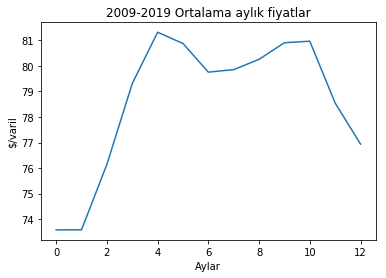

In [77]:
plot(pa.loc[:,range(2009,2020)].mean(axis=1))
title('2009-2019 Ortalama aylık fiyatlar')
xlabel("Aylar")
ylabel("$/varil");

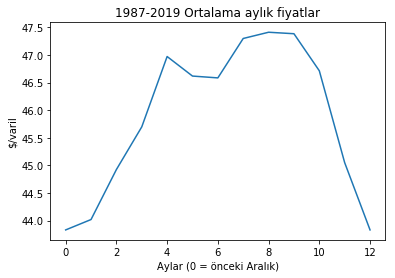

In [78]:
plot(pa.loc[:,range(1987,2020)].mean(axis=1))
title('1987-2019 Ortalama aylık fiyatlar')
xlabel("Aylar (0 = önceki Aralık)")
ylabel("$/varil");

## Haftanın günü etkisi

Acaba petrol fiyatlarında haftanın günü hareketin yönünü etkiliyor mu? Bazen "Cuma günleri açığa satma" gibi sözleri traderlardan duyabiliyoruz. Bakalım doğru mu?

Bu sefer verimizi haftanın günü yani **HG** değişkenine göre yeniden yapılandıracağız. Fakat önce % değişimleri hesaplamamız gerekecek

In [79]:
prices.head(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Hafta,Ay,Yil,HG
0,1987-05-20,18.63,21,5,1987,2
1,1987-05-21,18.45,21,5,1987,3
2,1987-05-22,18.55,21,5,1987,4


Günlük yüzde değişimleri hesaplayalım **pct_change** ile

In [80]:
prices["Yuzde"]=prices["Europe Brent Spot Price FOB (Dollars per Barrel)"].pct_change()
prices.head(3)

,Date,Europe Brent Spot Price FOB (Dollars per Barrel),Hafta,Ay,Yil,HG,Yuzde
0,1987-05-20,18.63,21,5,1987,2,NaN
1,1987-05-21,18.45,21,5,1987,3,-0.009662
2,1987-05-22,18.55,21,5,1987,4,0.005420


Şimdi pivot_table ile günleri sütunlara, yıllar da endeks olacak şekilde verimizi şekillendirelim. (0= Pazartesi, 4=Cuma)

In [81]:
pgun=prices.pivot_table( values='Yuzde', index=['Yil'],columns=['HG'], aggfunc=np.mean)

# This time check the last 5 lines
pgun.tail (5)

HG,0,1,2,3,4
Yil,,,,,
2015,-0.009459,0.000115,0.001394,0.005044,-0.004126
2016,-0.000331,-0.004429,0.004347,0.006471,0.003784
2017,0.002077,-0.000406,0.001024,0.002055,-0.000297
2018,0.004332,-0.002389,-0.002304,-0.002070,-0.001775
2019,-0.000282,-0.001299,0.030197,0.002433,0.011694


**pgun*** yani haftanın günlerinden derlenen veride kaç satır ve sütun var?

In [82]:
pgun.shape

(33, 5)

Bu fiyat değişimlerinin ne kadarı pozitif, ne kadarı negatifmiş. Önce pozitifler

In [83]:
pgun[pgun>0].count()

HG
0    14
1    14
2    18
3    24
4    19
dtype: int64

Şimdi de negatiflere bakalım (pday küçüktür sıfır)

In [84]:
pgun[pgun<0].count()

HG
0    19
1    19
2    15
3     9
4    14
dtype: int64

Olasılık hesabı da gayet basit, pozitifleri/negatifleri toplam satır sayısına böl

In [85]:
pgun[pgun>0].count()/pgun.shape[0]

HG
0    0.424242
1    0.424242
2    0.545455
3    0.727273
4    0.575758
dtype: float64

Haftanın 3.günü(0=Pazartesi), Perşembe gününün pozitif kapanma ihtimali çok çok yüksek: %72

In [86]:
pgun[pgun<0].count()/pgun.shape[0]

HG
0    0.575758
1    0.575758
2    0.454545
3    0.272727
4    0.424242
dtype: float64

Negatif, yanin düşüş ihtimali ise Pazartesi veya Salı daha yüksek görünüyor.

# Sonuç

Bu çalışma kitabında, basit filtreleme, gruplandırma, pivot tablo ve çizim fonksiyonlarını örneklemeye çalıştım.

Evet belki, petrol fiyatları tahmin edilemez, ama insan davranışlarına bağlı belirli eğilimler olabilir. Python ile bunları aramak, bulmak daha kolaylaşmışa benziyor

### Baris Sanli, 11 Şubat 2019,  barissanli2@gmail.com ,  www.barissanli.com